In [1]:
# exit()

# Data n Library Setup

In [2]:
# Packages Library

import pandas as pd
import numpy as np
import statistics as stats
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import math
import warnings
import sklearn
from datetime import datetime as dt
import regex as re

# ignore warning
warnings.filterwarnings('ignore')

In [3]:
# Plot Setup

from matplotlib import rcParams
rcParams['figure.figsize'] = (20, 10)
rcParams['axes.spines.right'] = True
rcParams['axes.spines.top'] = True
rcParams['axes.spines.bottom'] = True
rcParams['lines.linewidth'] = 2.5
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [4]:
# show all columns
pd.set_option('display.max_columns', None)

In [5]:
raw_df = pd.read_csv('/content/marketing_campaign_data.csv')
df = raw_df.copy()

In [6]:
df

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,10870,1967,S1,Menikah,61223000.0,0,1,13-06-2013,46,709000,43000,182000,42000,118000,247000,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,2236,4001,1946,S3,Bertunangan,64014000.0,2,1,10-06-2014,56,406000,0,30000,0,0,8000,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,2237,7270,1981,S1,Cerai,56981000.0,0,0,25-01-2014,91,908000,48000,217000,32000,12000,24000,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,2238,8235,1956,S2,Bertunangan,69245000.0,0,1,24-01-2014,8,428000,30000,214000,80000,30000,61000,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

# Features Engineering

In [8]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
# df['Complain'] = df['Complain'].as_type(str)
# df['Complain'] = df['Complain'].map({'0.0': 'No', '1.0': 'Yes'})
# df['Response'] = df['Response'].map({'0.0': 'No', '1.0': 'Yes'})

In [9]:
# Total Purchases
df['Total_Purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

# Total Visit
df['Store_Visit'] = (df['NumWebVisitsMonth'] + df['NumStorePurchases'] + df['NumCatalogPurchases'])

# Web Conversion Rate
df['Web_Purchase_Rate'] = df.apply(
    lambda row: 0 if row['NumWebVisitsMonth'] == 0 else row['NumWebPurchases'] / row['NumWebVisitsMonth'],
    axis=1
)

# Customer Age
current_year = 2014
df['Age'] = current_year - df['Year_Birth']
df['Age']

# Age Grouping
bins = [25, 35, 45, 55, 65]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '>65']
df['AgeGroup'] = pd.cut(
  df['Age'],
  bins=[float('-inf')] + bins + [float('inf')],
  labels=labels,
  right=True,
  include_lowest=True,
  ordered=False)

# Num of People at Home
df['People_at_Home'] = (df.apply(
    lambda row: row['Kidhome'] + row['Teenhome'] + 1 if row['Marital_Status'] == 'Menikah' else row['Kidhome'] + row['Teenhome'],
    axis=1
)+1)

# Total Spent
df['Total_Spent'] = df['MntCoke'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# Spent to Income Ratio
df['Spent_per_Income'] = df['Total_Spent'] / df['Income']

# Money per Person
# df['Money_per_Person'] = df['Income'] / df['People_at_Home']

# Income Level
millions = [i * (10**7) for i in range(1, 10)]
income_labels = ['< 10s', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s', '> 90s']
income_bins = [0] + millions + [100_000_000, float('inf')]

df['Income_Level'] = pd.cut(
  df['Income'],
  bins=income_bins,
  labels=income_labels,
  right=False,
  include_lowest=True
)

# Num of Campaign Needed
# cmp_cols = {
# 	'AcceptedCmp1': 1,
# 	'AcceptedCmp2': 2,
# 	'AcceptedCmp3': 3,
# 	'AcceptedCmp4': 4,
# 	'AcceptedCmp5': 5
# }

# def get_first_accepted_campaign(row):
# 	for col, num in sorted(cmp_cols.items(), key=lambda x: x[1]):
# 		if row[col] == 1:
# 			return num
# 	return None

# df['Num_of_CMP_Needed'] = df.apply(get_first_accepted_campaign, axis=1).fillna(0).astype(int)

cmp_cols = ['AcceptedCmp1',
 'AcceptedCmp2',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5']

df['Accepted_CMP'] = df[cmp_cols].sum(axis=1)

# Conversion Rate
df['Conv_Rate'] =  df['Accepted_CMP'] / df['Store_Visit']
df['Conv_Rate'] = df.apply(
    lambda row: 0 if row['Store_Visit'] == 0 else row['Accepted_CMP'] / row['Store_Visit'],
    axis=1
)

In [10]:
complete_df = df.copy()
complete_df.to_csv('complete_data.csv')

In [11]:
complete_df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Purchases,Store_Visit,Web_Purchase_Rate,Age,AgeGroup,People_at_Home,Total_Spent,Spent_per_Income,Income_Level,Accepted_CMP,Conv_Rate
0,0,5524,1957,S1,Lajang,58138000.0,0,0,2012-09-04,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,25,21,1.142857,57,56-65,1,1617000,0.027813,50s,0,0.0
1,1,2174,1954,S1,Lajang,46344000.0,1,1,2014-03-08,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,6,8,0.200000,60,56-65,3,27000,0.000583,40s,0,0.0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,21,16,2.000000,49,46-55,1,776000,0.010836,70s,0,0.0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-02-10,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,8,10,0.333333,30,26-35,2,53000,0.001989,20s,0,0.0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,19,14,1.000000,33,26-35,3,422000,0.007239,50s,0,0.0


In [12]:
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           2240 non-null   int64         
 1   ID                   2240 non-null   int64         
 2   Year_Birth           2240 non-null   int64         
 3   Education            2240 non-null   object        
 4   Marital_Status       2240 non-null   object        
 5   Income               2216 non-null   float64       
 6   Kidhome              2240 non-null   int64         
 7   Teenhome             2240 non-null   int64         
 8   Dt_Customer          2240 non-null   datetime64[ns]
 9   Recency              2240 non-null   int64         
 10  MntCoke              2240 non-null   int64         
 11  MntFruits            2240 non-null   int64         
 12  MntMeatProducts      2240 non-null   int64         
 13  MntFishProducts      2240 non-nul

# EDA

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           2240 non-null   int64         
 1   ID                   2240 non-null   int64         
 2   Year_Birth           2240 non-null   int64         
 3   Education            2240 non-null   object        
 4   Marital_Status       2240 non-null   object        
 5   Income               2216 non-null   float64       
 6   Kidhome              2240 non-null   int64         
 7   Teenhome             2240 non-null   int64         
 8   Dt_Customer          2240 non-null   datetime64[ns]
 9   Recency              2240 non-null   int64         
 10  MntCoke              2240 non-null   int64         
 11  MntFruits            2240 non-null   int64         
 12  MntMeatProducts      2240 non-null   int64         
 13  MntFishProducts      2240 non-nul

## Features Grouping

In [14]:
cmp_features = cmp_cols
mnt_features = ['MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
purchases_features = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']
ids = ['ID']
Z_features = ['Z_CostContact', 'Z_Revenue']
undefined_features = ['Unnamed: 0']
grouped_num_features = ['Income_Level', 'AgeGroup']
home_people = ['Kidhome', 'Teenhome']
marital_status = ['Marital_Status']

binary_features = ['Complain', 'Response']
cat_features = ['Education', 'Marital_Status', 'Income_Level', 'AgeGroup']
dtt_features = ['Dt_Customer']
num_features = []

for col in df.columns:
  if col not in binary_features + cat_features + dtt_features + cmp_features + mnt_features + purchases_features + ids + Z_features + undefined_features:
    num_features.append(col)

In [15]:
df[num_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year_Birth         2240 non-null   int64  
 1   Income             2216 non-null   float64
 2   Kidhome            2240 non-null   int64  
 3   Teenhome           2240 non-null   int64  
 4   Recency            2240 non-null   int64  
 5   NumWebVisitsMonth  2240 non-null   int64  
 6   Total_Purchases    2240 non-null   int64  
 7   Store_Visit        2240 non-null   int64  
 8   Web_Purchase_Rate  2240 non-null   float64
 9   Age                2240 non-null   int64  
 10  People_at_Home     2240 non-null   int64  
 11  Total_Spent        2240 non-null   int64  
 12  Spent_per_Income   2216 non-null   float64
 13  Accepted_CMP       2240 non-null   int64  
 14  Conv_Rate          2240 non-null   float64
dtypes: float64(4), int64(11)
memory usage: 262.6 KB


## Heatmap for Correlation

In [16]:
df_heatmap = df[num_features]
df_heatmap['Response'] = df['Response']

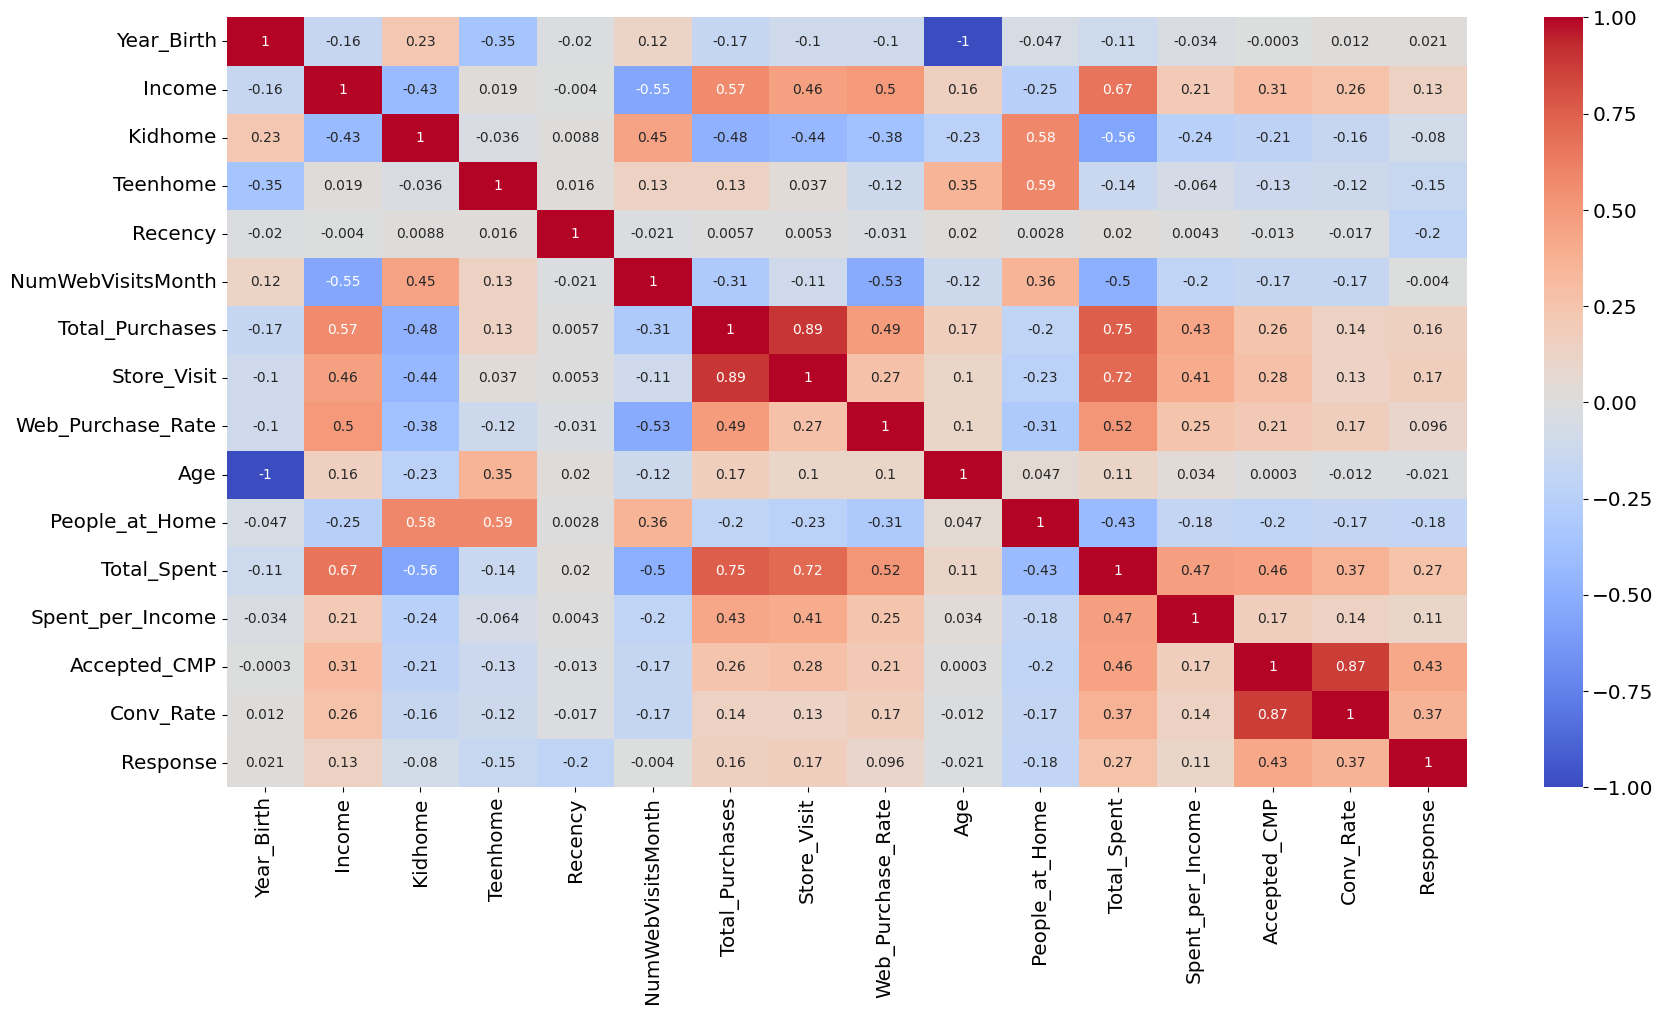

In [17]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_heatmap.corr(), annot=True, cmap='coolwarm')
plt.show()

In [18]:
high_corr = ['Total_Spent', 'Store_Visit', 'Year_Birth']

## Univariat Analysis

### Numeric Features

In [19]:
df[num_features].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year_Birth,2240.0,1.968806e+03,1.198407e+01,1.893000e+03,1.959000e+03,1.970000e+03,1.977000e+03,1.996000e+03
Income,2216.0,5.224725e+07,2.517308e+07,1.730000e+06,3.530300e+07,5.138150e+07,6.852200e+07,6.666660e+08
Kidhome,2240.0,4.441964e-01,5.383981e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00
Teenhome,2240.0,5.062500e-01,5.445382e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00
Recency,2240.0,4.910938e+01,2.896245e+01,0.000000e+00,2.400000e+01,4.900000e+01,7.400000e+01,9.900000e+01
NumWebVisitsMonth,2240.0,5.316518e+00,2.426645e+00,0.000000e+00,3.000000e+00,6.000000e+00,7.000000e+00,2.000000e+01
Total_Purchases,2240.0,1.486205e+01,7.677173e+00,0.000000e+00,8.000000e+00,1.500000e+01,2.100000e+01,4.400000e+01
Store_Visit,2240.0,1.376875e+01,4.551733e+00,0.000000e+00,1.000000e+01,1.300000e+01,1.700000e+01,2.900000e+01
Web_Purchase_Rate,2240.0,1.086698e+00,1.328946e+00,0.000000e+00,3.333333e-01,7.500000e-01,1.500000e+00,2.700000e+01
Age,2240.0,4.519420e+01,1.198407e+01,1.800000e+01,3.700000e+01,4.400000e+01,5.500000e+01,1.210000e+02


In [20]:
discrete_num_features = ['Kidhome', 'Teenhome', 'People_at_Home', 'Accepted_CMP']
continous_num_features = []
for col in num_features:
  if col not in discrete_num_features:
    continous_num_features.append(col)

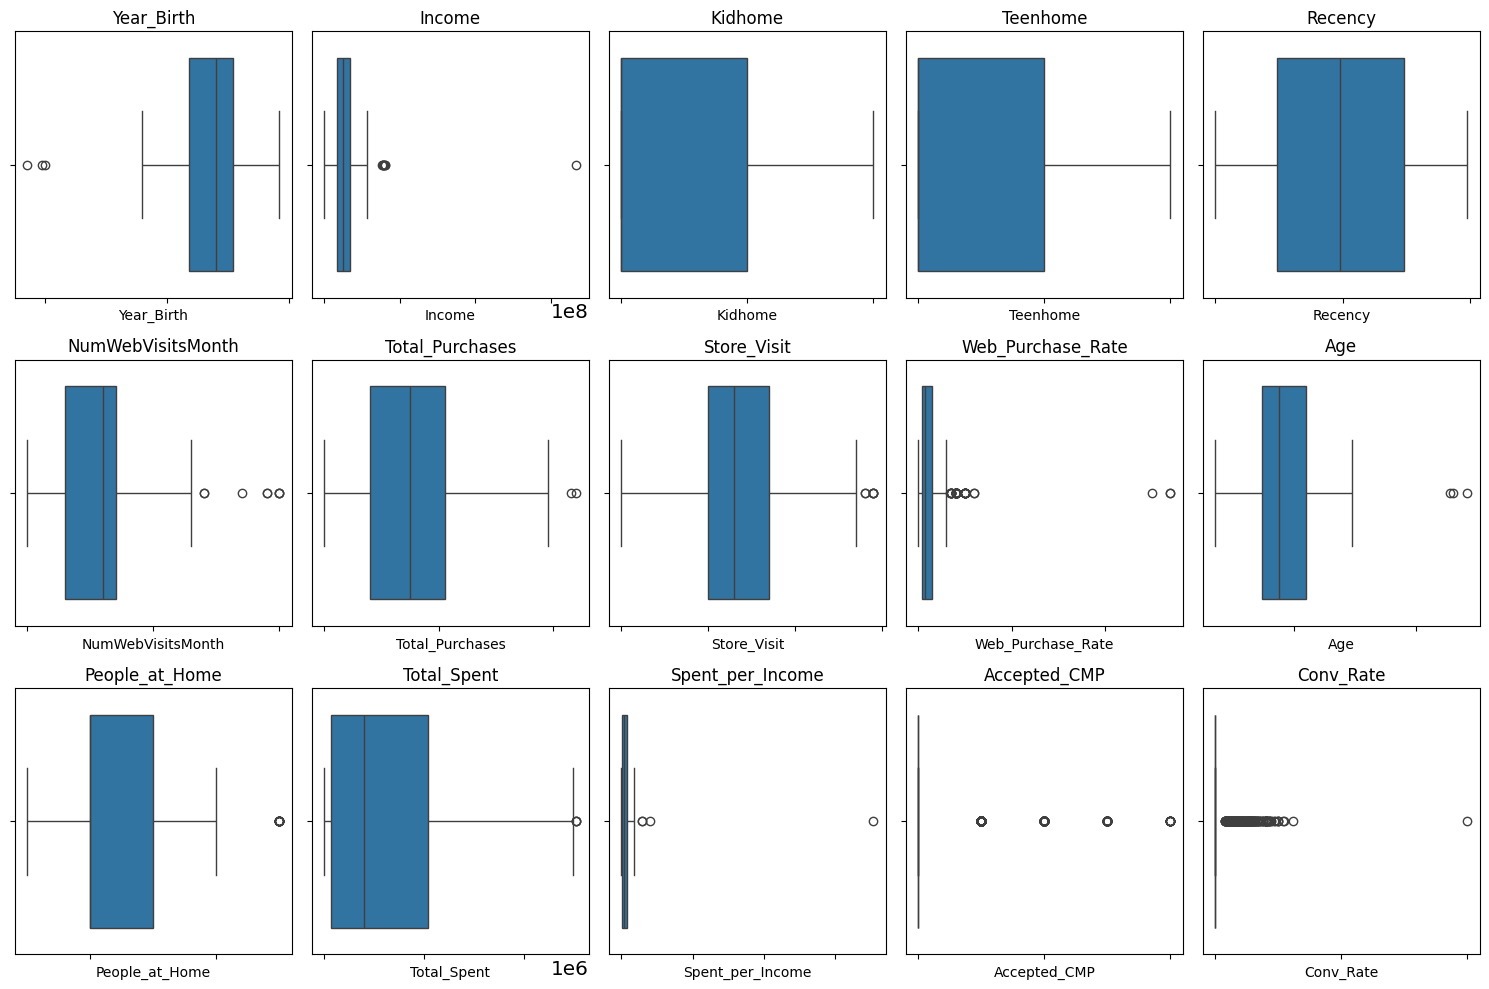

In [21]:
# Numeric Type Data Distribution through Box Plot
plt.figure(figsize=(15, 10))

for i, column in enumerate(num_features, 1):
  plt.subplot(3, 5, i)
  sns.boxplot(x=df[column])
  plt.title(column)
  plt.xticks(visible=False)
  plt.tight_layout()

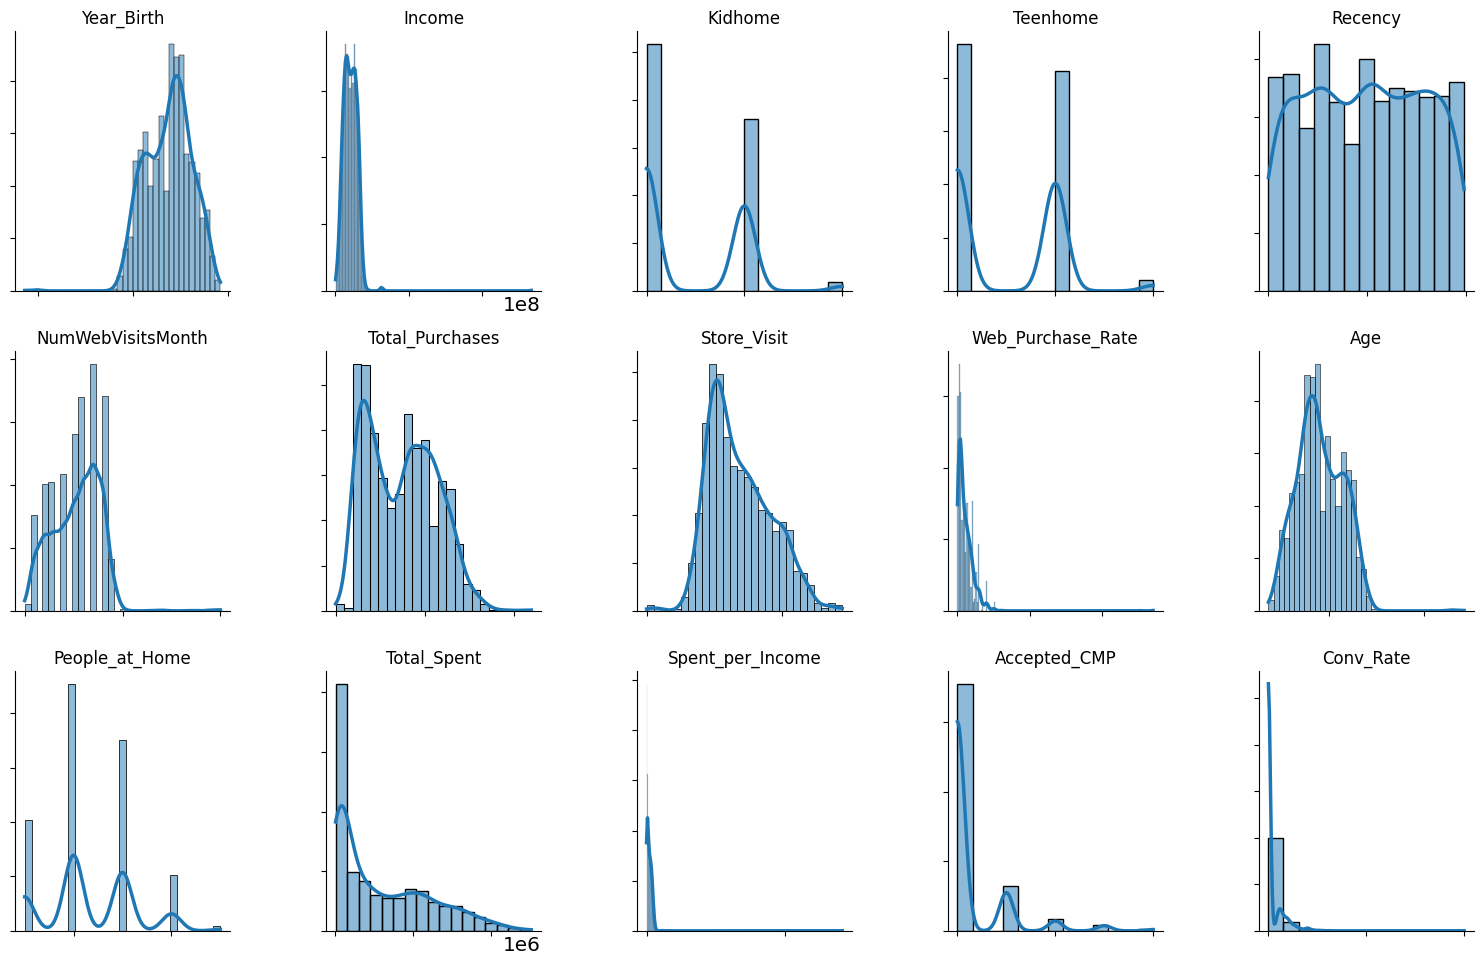

In [22]:
# Numeric Type Data Distribution through Normality Graph
plt.figure(figsize=(15, 10))

for i, column in enumerate(num_features, 1):
  plt.subplot(3, 5, i)
  sns.histplot(x=df[column], kde=True)
  plt.title(column)
  plt.tight_layout()
  plt.xticks(visible=False)
  plt.yticks(visible=False)
  plt.xlabel('')
  plt.ylabel('')
  plt.grid(False)
  plt.gca().spines['top'].set_visible(False)
  plt.gca().spines['right'].set_visible(False)
  # plt.gca().spines['bottom'].set_visible(False)
  # plt.gca().spines['left'].set_visible(False)

plt.show()

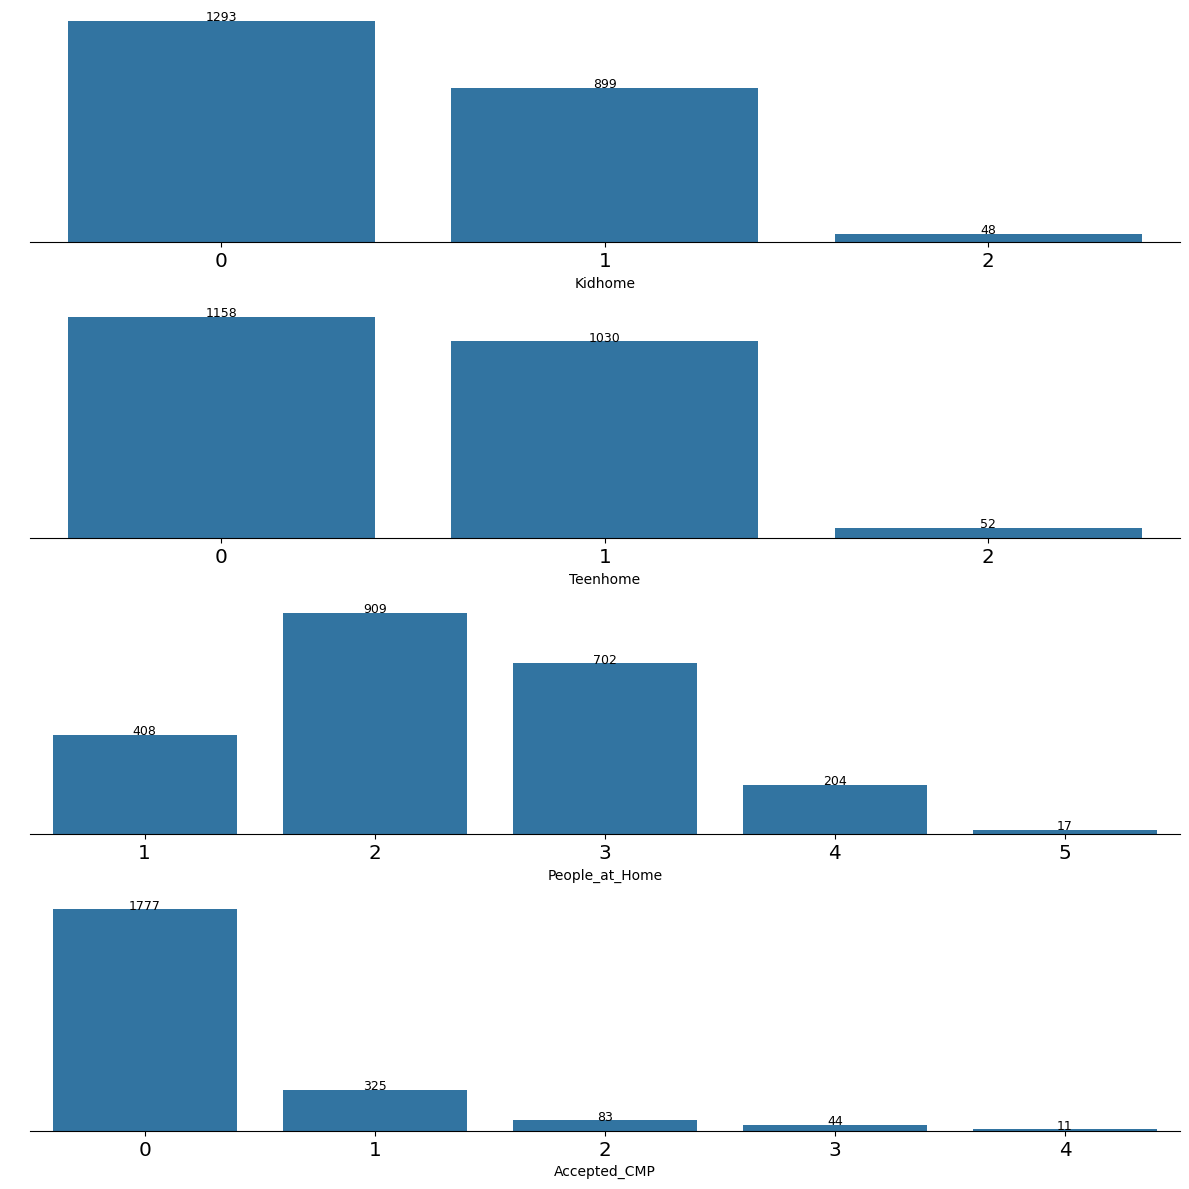

In [23]:
# countplot
fig, axs = plt.subplots(len(discrete_num_features), 1, figsize=(12, 12))

for i, feature in enumerate(discrete_num_features):
	ax = axs[i]
	sns.countplot(data=df, x=feature, ax=ax)
	for p in ax.patches:
		height = int(p.get_height())
		if height > 0:
			ax.text(p.get_x() + p.get_width() / 2., height + 1, str(height),
				ha="center", fontsize=9)

	# ax.set_title(f'{feature} by JobRole with Counts')
	ax.set_ylabel(' ')
	ax.set_xlabel(feature)

	# Hide y-axis ticks and labels (optional)
	ax.tick_params(axis='y', which='both', left=False, labelleft=False)

	# Remove spines
	ax.spines['top'].set_visible(False)
	ax.spines['right'].set_visible(False)
	ax.spines['left'].set_visible(False)

	# ax.legend(title='AgeGroup', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### Categoric Features

In [24]:
df_cat = df[cat_features + binary_features]
df_cat['Complain'] = df_cat['Complain'].astype(str)
df_cat['Response'] = df_cat['Response'].astype(str)

df_cat.describe().transpose()

,count,unique,top,freq
Education,2240,5,S1,1127
Marital_Status,2240,6,Menikah,864
Income_Level,2216,11,30s,362
AgeGroup,2240,6,36-45,758
Complain,2240,2,0,2219
Response,2240,2,0,1906


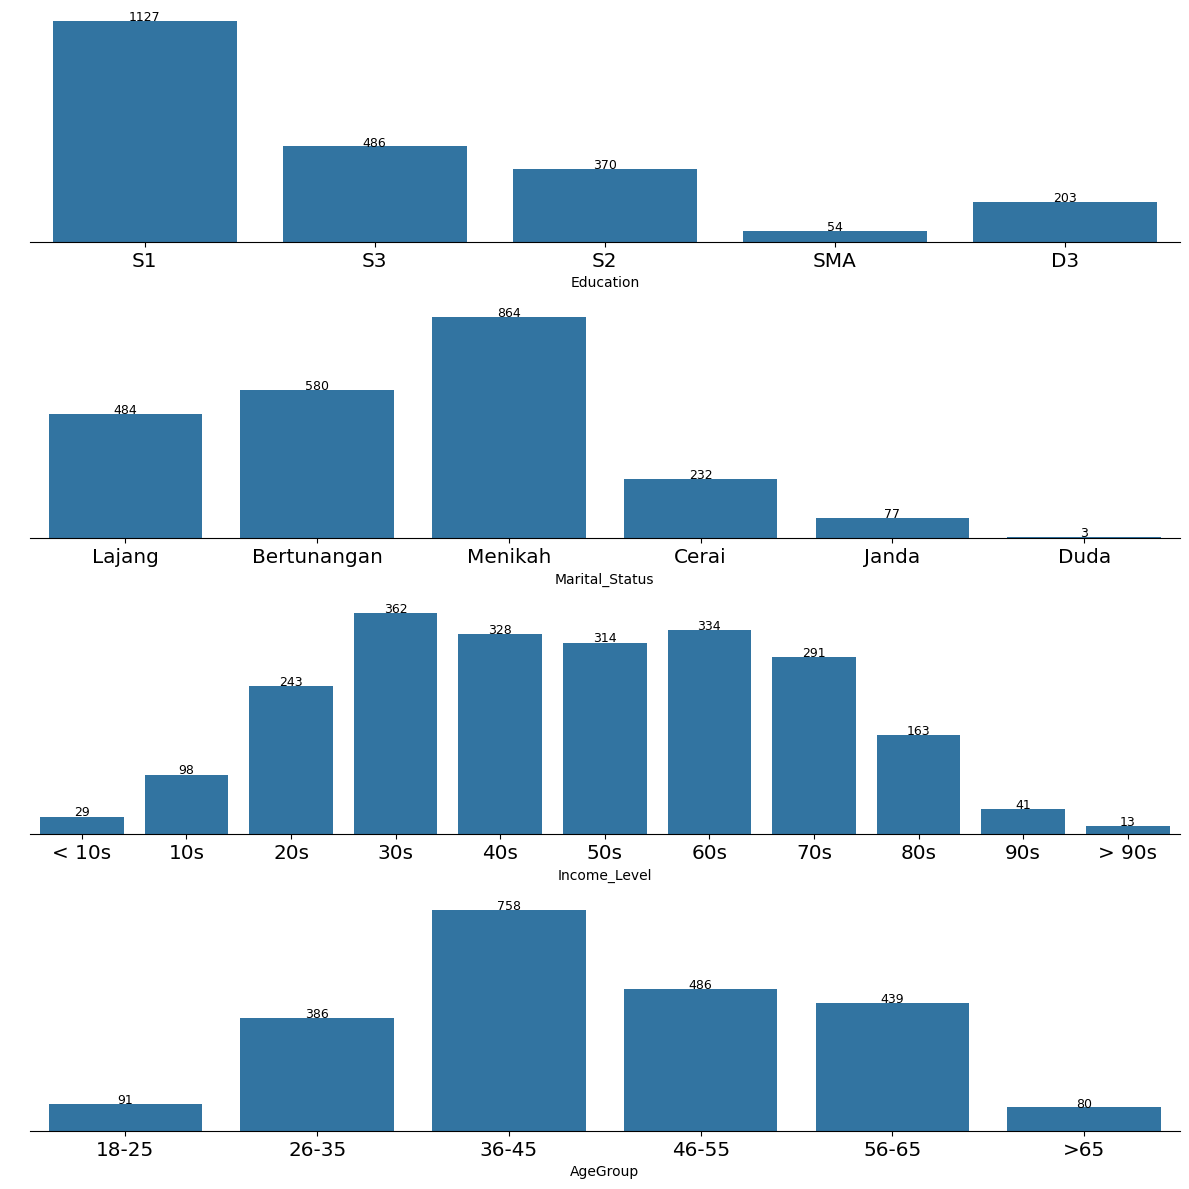

In [25]:
# countplot
fig, axs = plt.subplots(len(cat_features), 1, figsize=(12, 12))

for i, feature in enumerate(cat_features):
	ax = axs[i]
	sns.countplot(data=df, x=feature, ax=ax)

	for p in ax.patches:
		height = int(p.get_height())
		if height > 0:
			ax.text(p.get_x() + p.get_width() / 2., height + 1, str(height),
				ha="center", fontsize=9)

	# ax.set_title(f'{feature} by JobRole with Counts')
	ax.set_ylabel(' ')
	ax.set_xlabel(feature)

	# Hide y-axis ticks and labels (optional)
	ax.tick_params(axis='y', which='both', left=False, labelleft=False)

	# Remove spines
	ax.spines['top'].set_visible(False)
	ax.spines['right'].set_visible(False)
	ax.spines['left'].set_visible(False)

	# ax.legend(title='AgeGroup', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [26]:
df['Response'].value_counts()

,count
Response,
0,1906
1,334


## Multivariat

### Response by Age

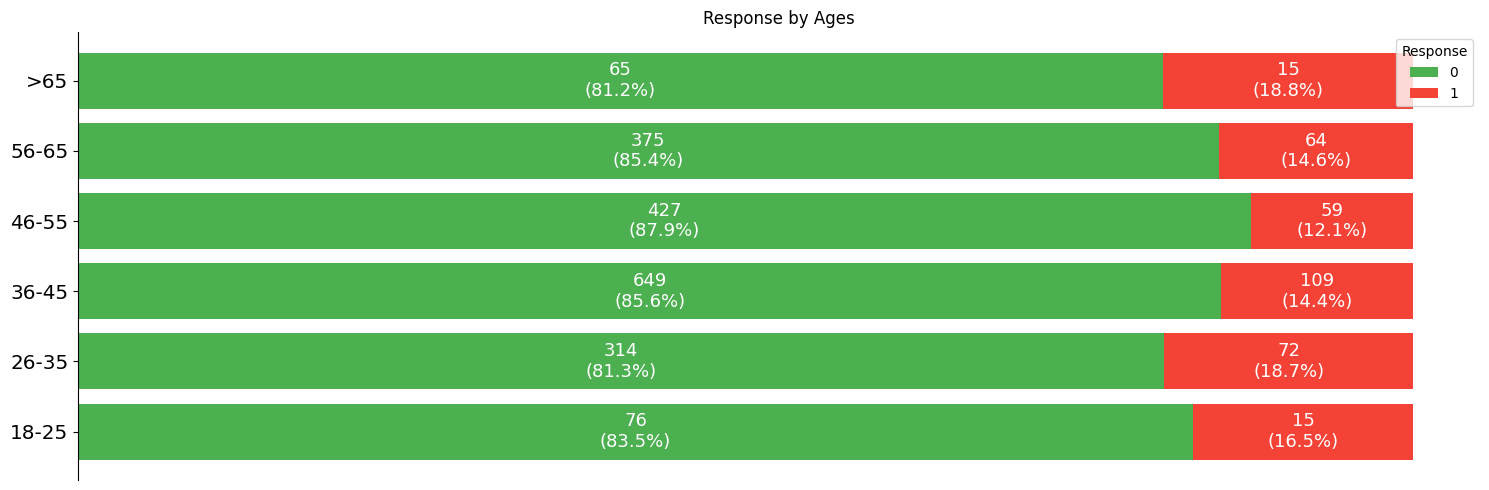

In [27]:
# countplot
# sns.countplot(data=df, x='AgeGroup', hue='Response')
ct = pd.crosstab(df['AgeGroup'], df['Response'])
ct_perc = ct.div(ct.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(15,5))
lefts = [0] * len(ct)
colors = ['#4CAF50', '#F44336']

for i, col in enumerate(ct.columns):
	bars = ax.barh(ct.index, ct_perc[col], left=lefts, color=colors[i], label=col)
	for j, (v, c, left) in enumerate(zip(ct_perc[col], ct[col], lefts)):
		if v > 0:
			ax.text(left + v/2, j, f'{c}\n({v:.1f}%)', ha='center', va='center', color='white', fontsize=13)
	lefts = [lefts[k] + ct_perc[col][k] for k in range(len(lefts))]

ax.set_title('Response by Ages')
ax.legend(title='Response', loc='upper right')
plt.xticks(visible=False)
plt.xlabel('')
# no spine
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
ax.xaxis.set_ticks([])
ax.xaxis.set_ticklabels([])
plt.tight_layout()
plt.show()

### Conv Rate by Age

In [28]:
conv_rate_by_age = df.groupby('AgeGroup')['Conv_Rate'].mean()

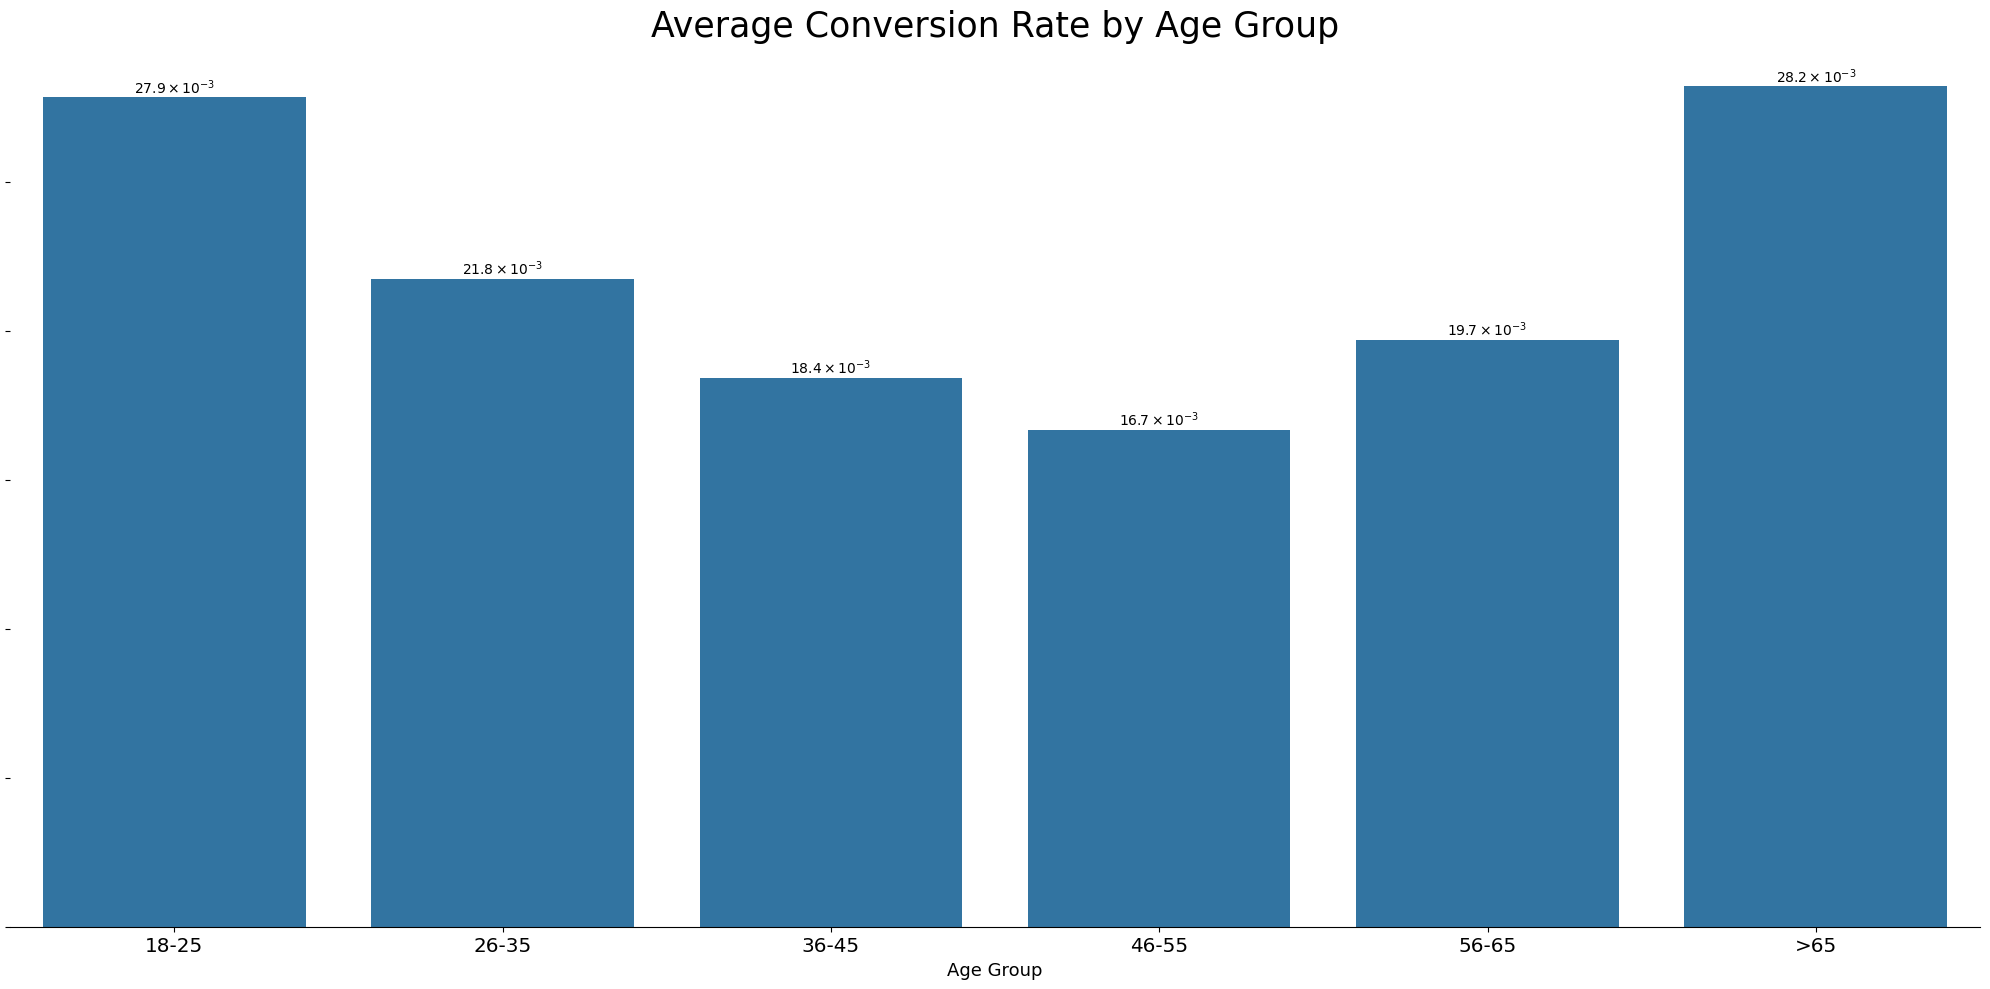

In [29]:
# barplot without spine
sns.barplot(x=conv_rate_by_age.index, y=conv_rate_by_age.values)
plt.title('Average Conversion Rate by Age Group', fontsize=25)
plt.xlabel('Age Group', fontsize=13)
# no spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.xlabel('Age Group')
# plt.ylabel('Average Conversion Rate')
plt.yticks(visible=False)
# annotations
for i, v in enumerate(conv_rate_by_age.values):
  scaled_v = v * 1000
  plt.text(i, v + 0.00005, f'${scaled_v:.1f}\\times10^{{-3}}$', ha='center', va='bottom')
plt.tight_layout()
plt.show()

### Amount of Spent by Age

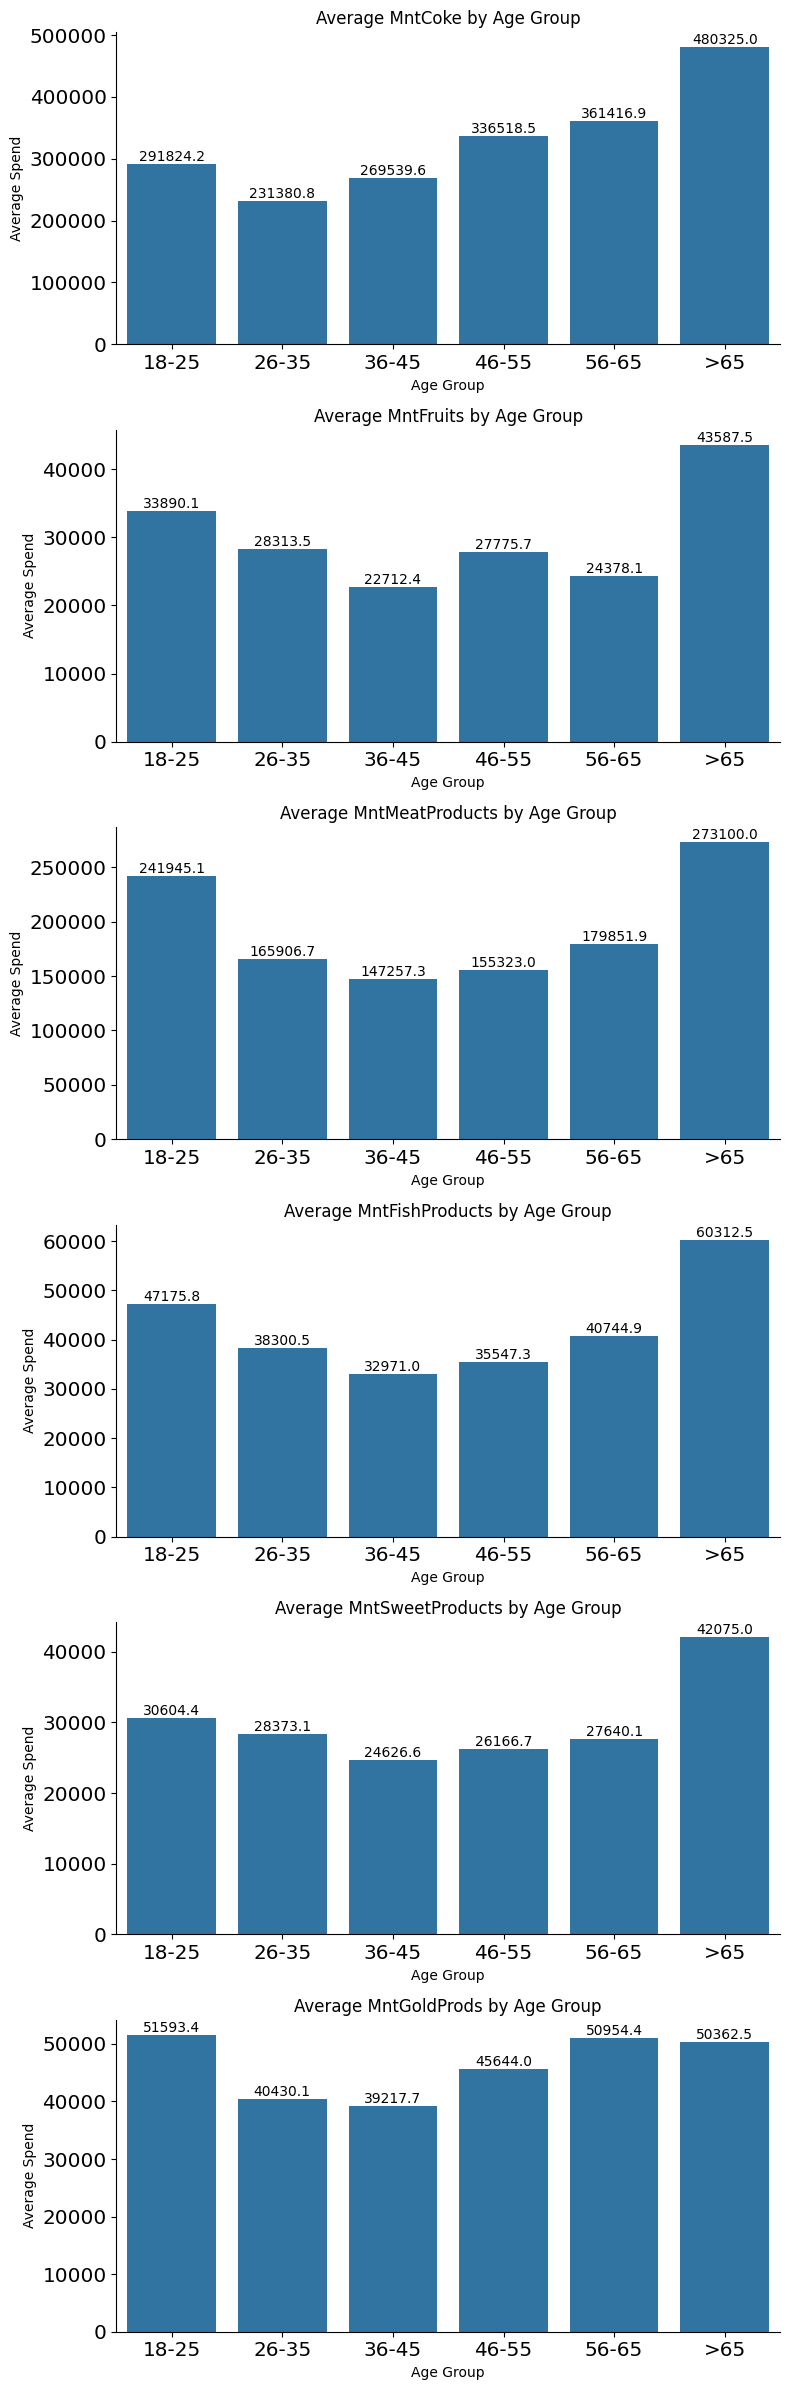

In [30]:
fig, axs = plt.subplots(len(mnt_features), figsize=(8, len(mnt_features) * 4))

for i, feature in enumerate(mnt_features):
  ax = axs[i]
  sns.barplot(data=df, x='AgeGroup', y=feature, ci=None, ax=ax)
  ax.set_title(f'Average {feature} by Age Group')
  ax.set_xlabel('Age Group')
  ax.set_ylabel('Average Spend')
  sns.despine(ax=ax)
  #annotations
  group_means = df.groupby('AgeGroup')[feature].mean()
  for j, age_group in enumerate(group_means.index):
    value = group_means[age_group]
    ax.text(j, value + 1, f'{value:.1f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

### Purchases by Age

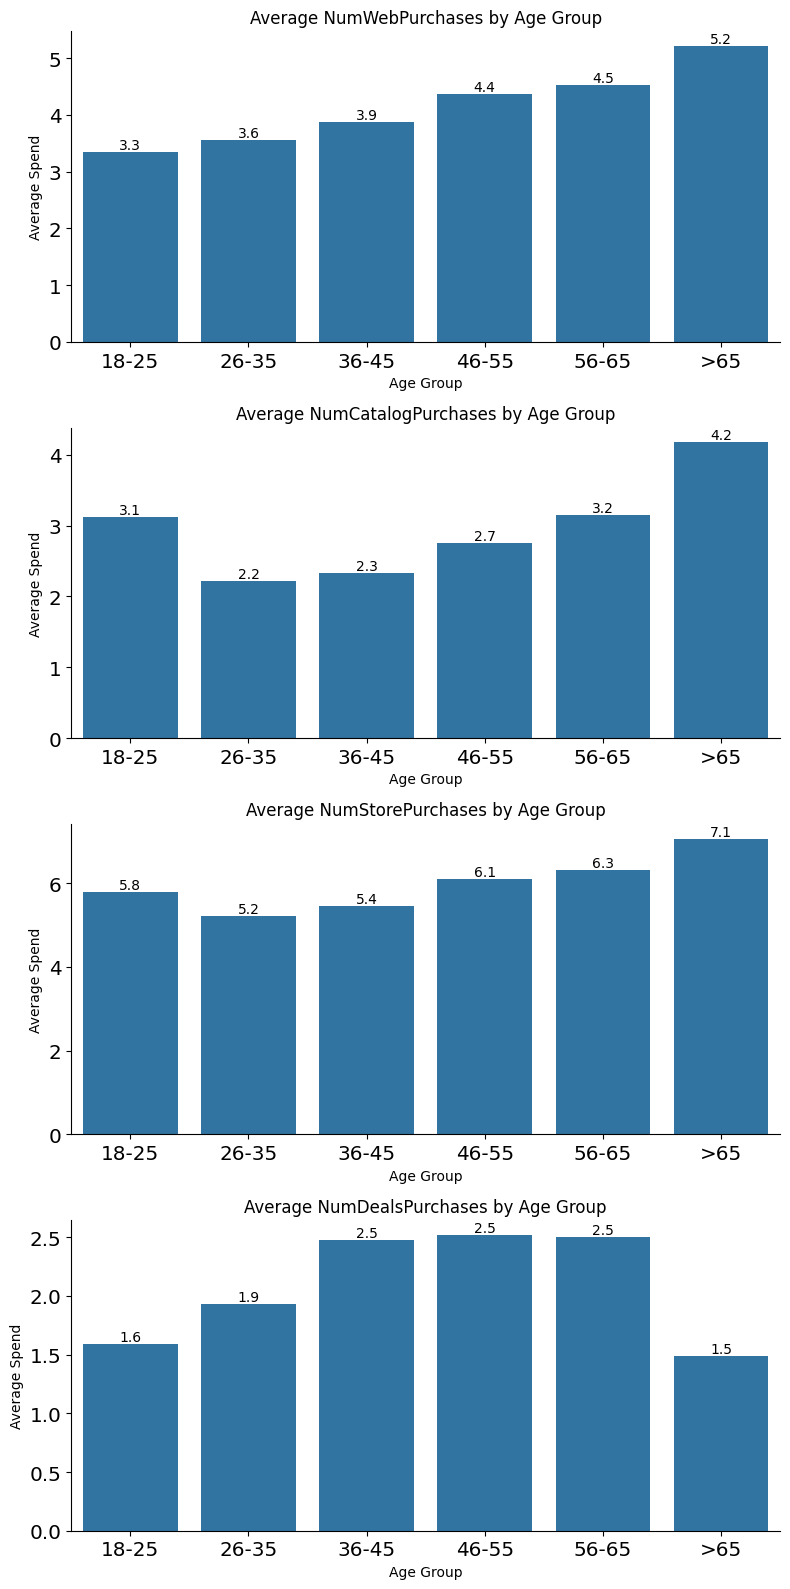

In [31]:
fig, axs = plt.subplots(len(purchases_features), figsize=(8, len(purchases_features) * 4))

for i, feature in enumerate(purchases_features):
  ax = axs[i]
  sns.barplot(data=df, x='AgeGroup', y=feature, ci=None, ax=ax)
  ax.set_title(f'Average {feature} by Age Group')
  ax.set_xlabel('Age Group')
  ax.set_ylabel('Average Spend')
  sns.despine(ax=ax)
  # annotations
  group_means = df.groupby('AgeGroup')[feature].mean()
  for j, age_group in enumerate(group_means.index):
    value = group_means[age_group]
    ax.text(j, value, f'{value:.1f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

### Response by Income

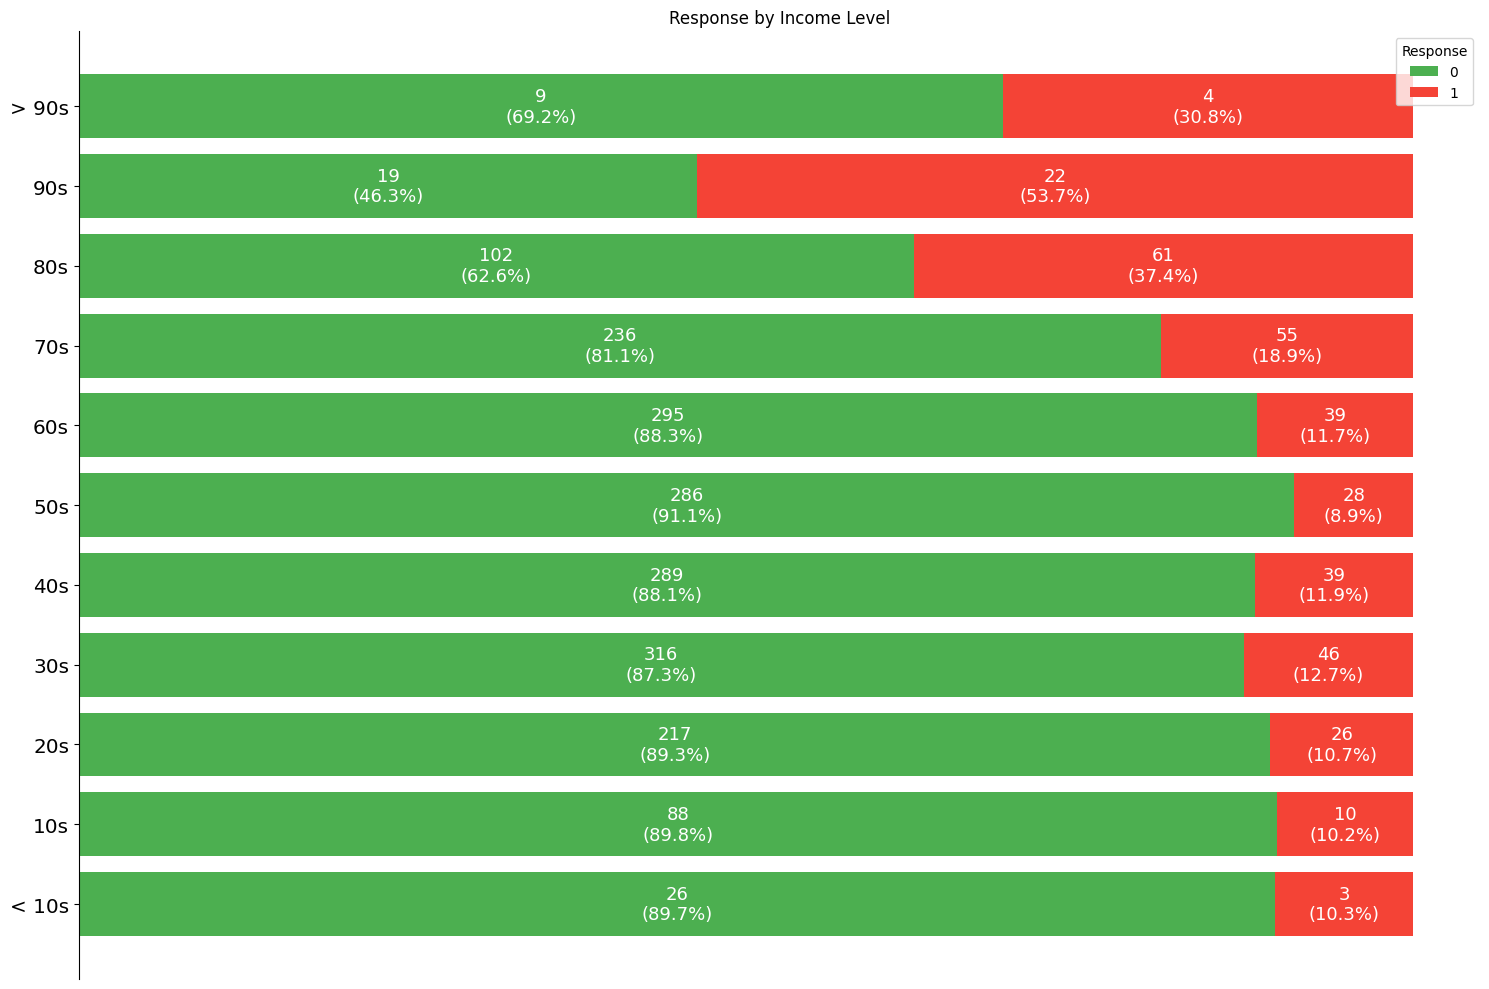

In [32]:
# Countplot by Income_Level
ct = pd.crosstab(df['Income_Level'], df['Response'])
ct_perc = ct.div(ct.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(15,10))
lefts = [0] * len(ct)
colors = ['#4CAF50', '#F44336']

for i, col in enumerate(ct.columns):
  ax.barh(ct.index, ct_perc[col], left=lefts, color=colors[i], label=col)
  for j, (v, c, left) in enumerate(zip(ct_perc[col], ct[col], lefts)):
    if v > 0:
      ax.text(left + v/2, j, f'{c}\n({v:.1f}%)', ha='center', va='center', color='white', fontsize=13)
  lefts = [lefts[k] + ct_perc[col][k] for k in range(len(lefts))]

ax.set_title('Response by Income Level')
ax.legend(title='Response', loc='upper right')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_ticks([])
plt.tight_layout()
plt.show()

### Campaign by Response

In [33]:
df_cmp = df[cmp_cols]
df_cmp['Response'] = df['Response']

In [34]:
df_cmp['Num_of_CMP_Needed'] = df_cmp[cmp_cols].sum(axis=1)

In [35]:
df_cmp[(df_cmp['AcceptedCmp2'] == 1)]

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Num_of_CMP_Needed
252,1,1,0,1,1,1,4
295,0,1,0,1,0,0,2
342,0,1,0,1,0,0,2
417,1,1,0,1,1,0,4
430,1,1,0,1,1,1,4
559,1,1,0,1,1,1,4
575,1,1,0,1,0,1,3
804,1,1,0,1,0,1,3
822,0,1,0,0,0,1,1
824,1,1,0,1,1,1,4


In [36]:
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Purchases,Store_Visit,Web_Purchase_Rate,Age,AgeGroup,People_at_Home,Total_Spent,Spent_per_Income,Income_Level,Accepted_CMP,Conv_Rate
0,0,5524,1957,S1,Lajang,58138000.0,0,0,2012-09-04,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,25,21,1.142857,57,56-65,1,1617000,0.027813,50s,0,0.0
1,1,2174,1954,S1,Lajang,46344000.0,1,1,2014-03-08,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,6,8,0.200000,60,56-65,3,27000,0.000583,40s,0,0.0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,21,16,2.000000,49,46-55,1,776000,0.010836,70s,0,0.0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-02-10,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,8,10,0.333333,30,26-35,2,53000,0.001989,20s,0,0.0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,19,14,1.000000,33,26-35,3,422000,0.007239,50s,0,0.0


In [37]:
df.groupby('Response')['Accepted_CMP'].value_counts()

Response  Accepted_CMP
0         0               1631
          1                224
          2                 41
          3                  9
          4                  1
1         0                146
          1                101
          2                 42
          3                 35
          4                 10
Name: count, dtype: int64

In [38]:
df[df['Response'] == 0][cmp_cols]

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
5,0,0,0,0,0
...,...,...,...,...,...
2234,0,0,0,0,0
2235,0,0,0,0,0
2236,1,0,0,0,0
2237,0,0,0,1,0


# Data Simplificiation


In [39]:
to_drop = [high_corr, grouped_num_features, cmp_features, mnt_features, purchases_features, ids, Z_features, undefined_features, home_people, marital_status, dtt_features]
to_drop = [item for sublist in to_drop for item in sublist]

In [40]:
simplified_df = df.drop(columns=to_drop)
simplified_df.to_csv('reduced_data.csv')

In [41]:
simplified_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2240 non-null   object 
 1   Income             2216 non-null   float64
 2   Recency            2240 non-null   int64  
 3   NumWebVisitsMonth  2240 non-null   int64  
 4   Complain           2240 non-null   int64  
 5   Response           2240 non-null   int64  
 6   Total_Purchases    2240 non-null   int64  
 7   Web_Purchase_Rate  2240 non-null   float64
 8   Age                2240 non-null   int64  
 9   People_at_Home     2240 non-null   int64  
 10  Spent_per_Income   2216 non-null   float64
 11  Accepted_CMP       2240 non-null   int64  
 12  Conv_Rate          2240 non-null   float64
dtypes: float64(4), int64(8), object(1)
memory usage: 227.6+ KB


# Data Splitting

## Target n Feature Separation

In [42]:
y = simplified_df['Response']
x = simplified_df.drop(columns=['Response'])

## Advanced Features Grouping

In [43]:
# Advanced Features Grouping
cat_features_2 = []
for col in x.columns:
  if col in cat_features:
    cat_features_2.append(col)

num_features_2 = []
for col in x.columns:
  if col in num_features:
    num_features_2.append(col)

In [44]:
print(cat_features_2)
print(num_features_2)

['Education']
['Income', 'Recency', 'NumWebVisitsMonth', 'Total_Purchases', 'Web_Purchase_Rate', 'Age', 'People_at_Home', 'Spent_per_Income', 'Accepted_CMP', 'Conv_Rate']


In [45]:
ordinal_cat_features = ['Education']
nominal_cat_features = []

for col in cat_features_2:
  if col not in ordinal_cat_features:
    nominal_cat_features.append(col)

In [46]:
print(ordinal_cat_features)
print(nominal_cat_features)

['Education']
[]


### Linearity Test

In [47]:
import statsmodels.api as sm
from scipy.stats import chi2_contingency

In [48]:
def linearity_test(df, target_col, alpha=0.05):
  print("Box-Tidwell Test")
  non_linear_features = []
  for col in num_features_2:
    try:
      df_temp = df[[col, target_col]].dropna()
      df_temp = df_temp[df_temp[col] > 0]
      df_temp[f'{col}_log'] = df_temp[col] * np.log(df_temp[col])

      X = sm.add_constant(df_temp[[col, f'{col}_log']])
      y = df_temp[target_col]
      model = sm.Logit(y, X).fit(disp=0)

      p_value = model.pvalues.get(f'{col}_log', np.nan)
      result = "Non-linear" if p_value < alpha else "Linear"
      print(f" - {col}: p = {p_value:.4f} → {result}")
      if p_value < alpha:
        non_linear_features.append(col)
    except Exception as e:
        print(f" - {col}: Skipped ({e})")

In [49]:
linearity_test(simplified_df, 'Response')

Box-Tidwell Test
 - Income: p = 0.0000 → Non-linear
 - Recency: p = 0.0861 → Linear
 - NumWebVisitsMonth: p = 0.0131 → Non-linear
 - Total_Purchases: p = 0.0001 → Non-linear
 - Web_Purchase_Rate: p = 0.0174 → Non-linear
 - Age: p = 0.1647 → Linear
 - People_at_Home: p = 0.0003 → Non-linear
 - Spent_per_Income: p = 0.0058 → Non-linear
 - Accepted_CMP: p = 0.4594 → Linear
 - Conv_Rate: p = 0.0013 → Non-linear


# Data Preprocessing

## Missing Values

In [50]:
# To see how much each features lost their values
for i in x:
  missing = x[i].isna().sum()
  proportion = missing / len(df) * 100
  print(f'{i}: {missing} ({proportion:.2f}%)')

Education: 0 (0.00%)
Income: 24 (1.07%)
Recency: 0 (0.00%)
NumWebVisitsMonth: 0 (0.00%)
Complain: 0 (0.00%)
Total_Purchases: 0 (0.00%)
Web_Purchase_Rate: 0 (0.00%)
Age: 0 (0.00%)
People_at_Home: 0 (0.00%)
Spent_per_Income: 24 (1.07%)
Accepted_CMP: 0 (0.00%)
Conv_Rate: 0 (0.00%)


## Duplicates

In [51]:
x.duplicated().sum()

np.int64(205)

## Outliers

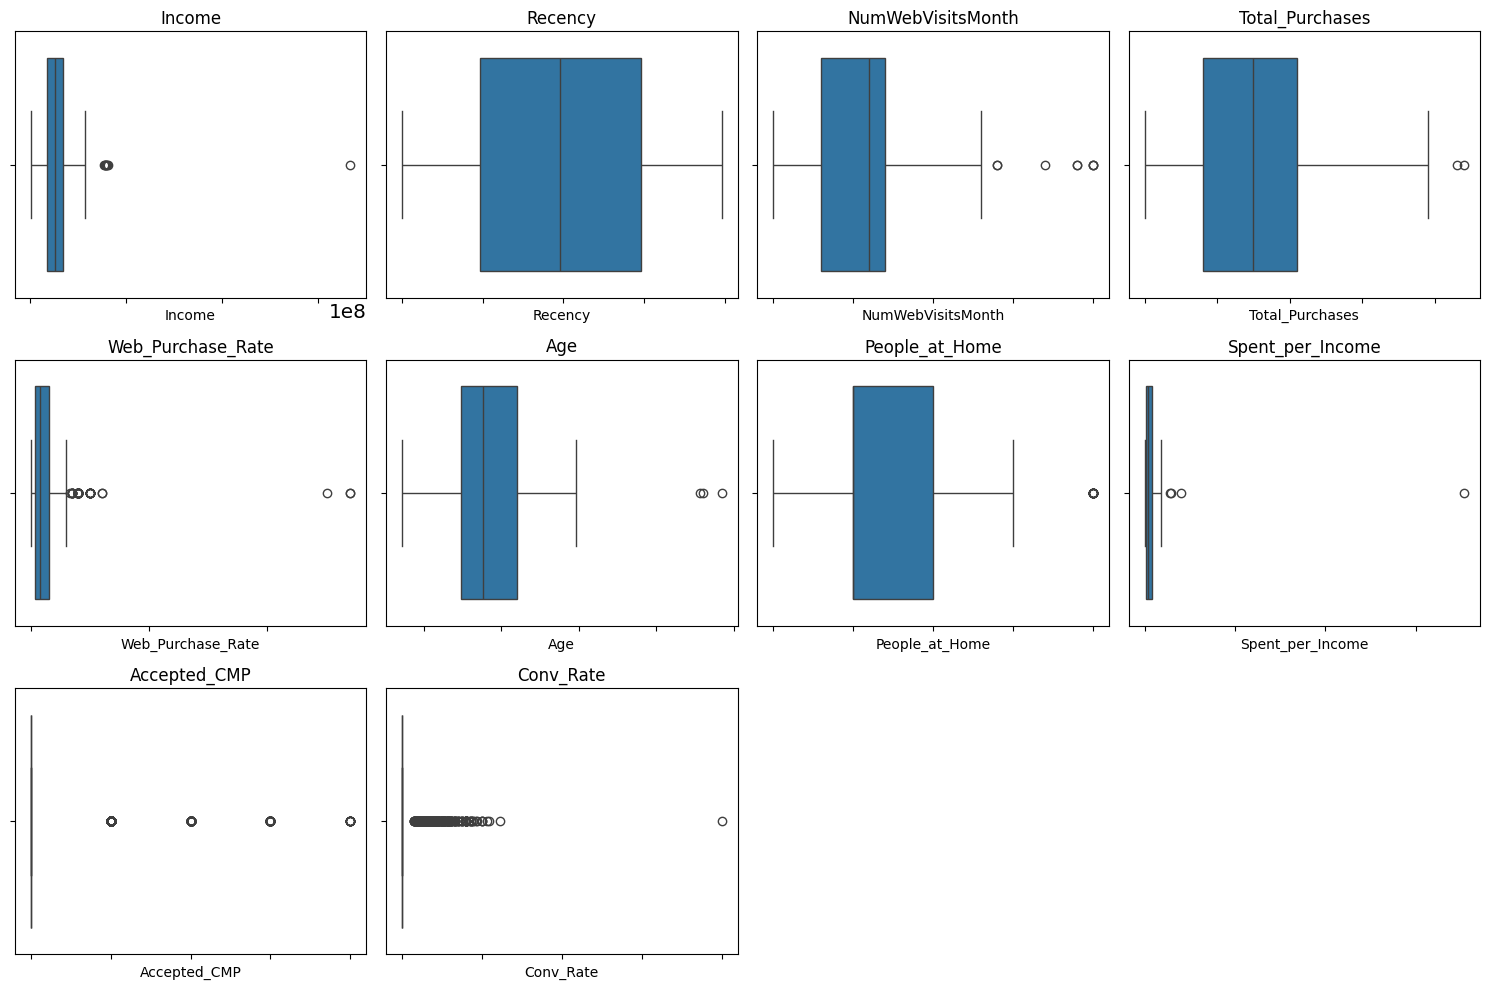

In [52]:
# Pre Transformation and Rescale
plt.figure(figsize=(15, 10))

for i, column in enumerate(num_features_2, 1):
  plt.subplot(3, 4, i)
  sns.boxplot(x=x[column])
  plt.title(column)
  plt.xticks(visible=False)
  plt.tight_layout()

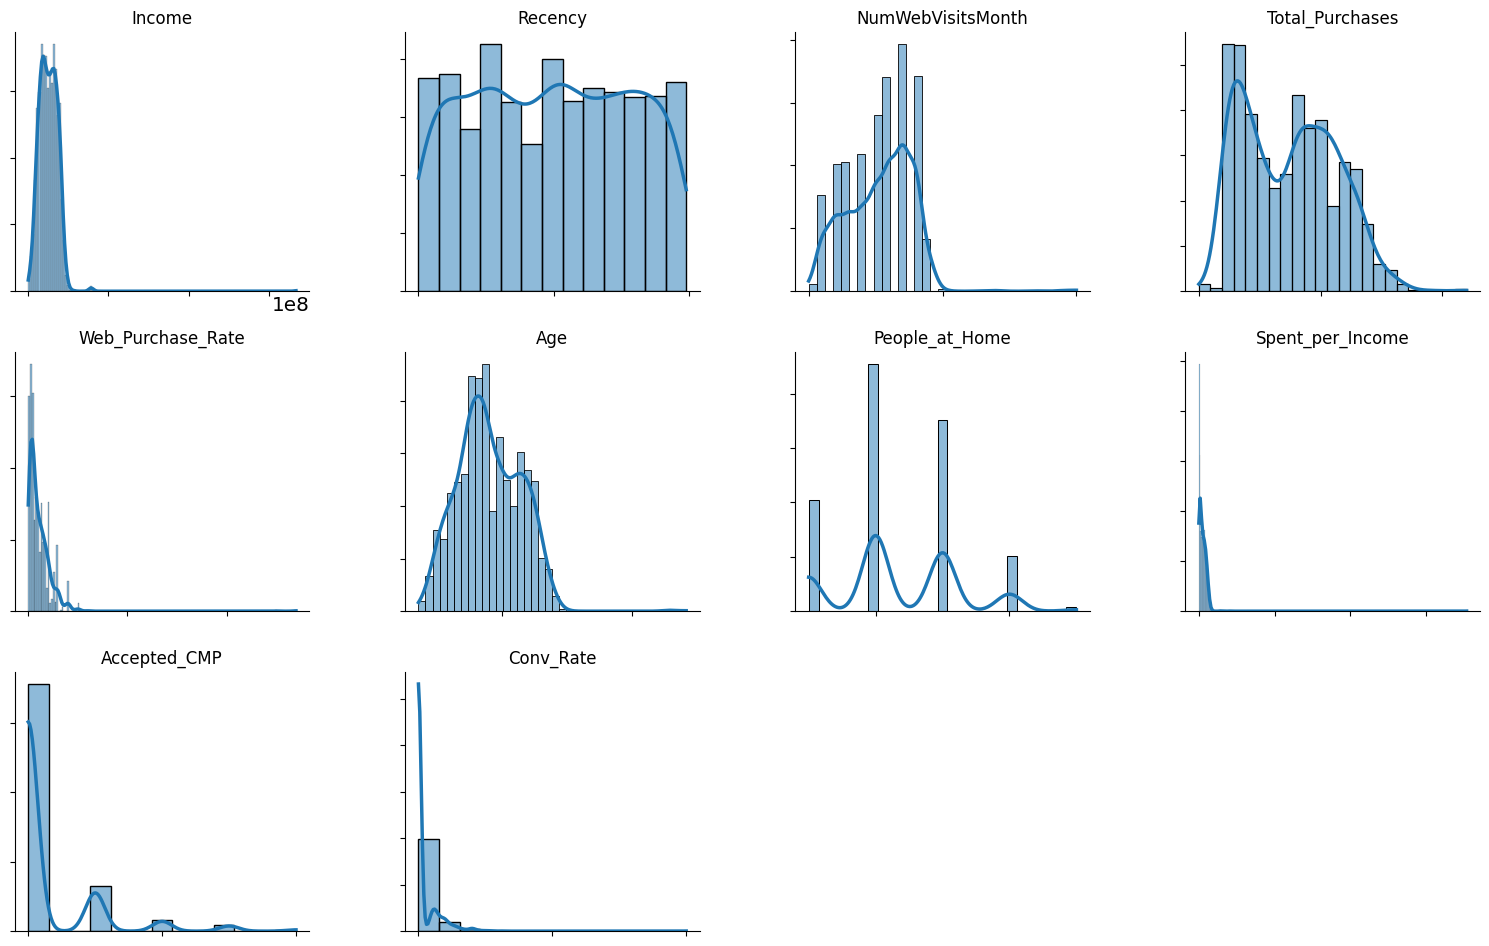

In [53]:
# Pre Transformation and Rescale
plt.figure(figsize=(15, 10))

for i, column in enumerate(num_features_2, 1):
  plt.subplot(3, 4, i)
  sns.histplot(x=x[column], kde=True)
  plt.title(column)
  plt.tight_layout()
  plt.xticks(visible=False)
  plt.yticks(visible=False)
  plt.xlabel('')
  plt.ylabel('')
  plt.grid(False)
  plt.gca().spines['top'].set_visible(False)
  plt.gca().spines['right'].set_visible(False)
  # plt.gca().spines['bottom'].set_visible(False)
  # plt.gca().spines['left'].set_visible(False)

plt.show()

## Pipeline

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer

In [55]:
education_level = ['SMA', 'D3', 'S1', 'S2', 'S3']

In [56]:
# Pipeline

# Drop duplicates
drop_dpl = (
    simplified_df
    .drop_duplicates(inplace=True)
)

# Num Pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

# Cat Pipeline
nom_cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

ord_cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(categories=[education_level]))
])

# Combine
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features_2),
    ('nom_cat', nom_cat_pipeline, nominal_cat_features),
    ('ord_cat', ord_cat_pipeline, ordinal_cat_features)
])

In [57]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2240 non-null   object 
 1   Income             2216 non-null   float64
 2   Recency            2240 non-null   int64  
 3   NumWebVisitsMonth  2240 non-null   int64  
 4   Complain           2240 non-null   int64  
 5   Total_Purchases    2240 non-null   int64  
 6   Web_Purchase_Rate  2240 non-null   float64
 7   Age                2240 non-null   int64  
 8   People_at_Home     2240 non-null   int64  
 9   Spent_per_Income   2216 non-null   float64
 10  Accepted_CMP       2240 non-null   int64  
 11  Conv_Rate          2240 non-null   float64
dtypes: float64(4), int64(7), object(1)
memory usage: 210.1+ KB


In [58]:
processed_x = preprocessor.fit_transform(x)

In [59]:
final_features = list(num_features_2) + ordinal_cat_features # + [i for i in binary_features if i in x.columns]

In [60]:
sorted(final_features)

['Accepted_CMP',
 'Age',
 'Conv_Rate',
 'Education',
 'Income',
 'NumWebVisitsMonth',
 'People_at_Home',
 'Recency',
 'Spent_per_Income',
 'Total_Purchases',
 'Web_Purchase_Rate']

In [61]:
processed_x = pd.DataFrame(processed_x, columns=final_features)
processed_x['Complain'] = x['Complain']

In [62]:
processed_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Income             2240 non-null   float64
 1   Recency            2240 non-null   float64
 2   NumWebVisitsMonth  2240 non-null   float64
 3   Total_Purchases    2240 non-null   float64
 4   Web_Purchase_Rate  2240 non-null   float64
 5   Age                2240 non-null   float64
 6   People_at_Home     2240 non-null   float64
 7   Spent_per_Income   2240 non-null   float64
 8   Accepted_CMP       2240 non-null   float64
 9   Conv_Rate          2240 non-null   float64
 10  Education          2240 non-null   float64
 11  Complain           2240 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 210.1 KB


# Feature Reduction

In [63]:
# umap
import umap

In [64]:
umap_model = umap.UMAP(n_components=2, random_state=42)

x_umap = umap_model.fit_transform(processed_x)
df_umap = pd.DataFrame(x_umap, columns=['UMAP_1', 'UMAP_2'])

In [65]:
df_umap

,UMAP_1,UMAP_2
0,-2.308452,4.727779
1,9.643203,4.160050
2,-2.678607,5.034500
3,-0.043286,-0.127921
4,3.584503,10.357648
...,...,...
2235,7.943941,5.053591
2236,4.330871,9.413341
2237,-1.991709,5.348283
2238,0.788503,4.681943


# Clustering & Evaluation

## KMeans

In [66]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [67]:
df_umap_kmeans = df_umap.copy()

for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(df_umap_kmeans)
  sil_score = silhouette_score(df_umap_kmeans, kmeans.labels_)
  print(f"Silhouette Score (k = {k}): {sil_score:.2f}")

Silhouette Score (k = 2): 0.48
Silhouette Score (k = 3): 0.47
Silhouette Score (k = 4): 0.48
Silhouette Score (k = 5): 0.47
Silhouette Score (k = 6): 0.44
Silhouette Score (k = 7): 0.45
Silhouette Score (k = 8): 0.47
Silhouette Score (k = 9): 0.50
Silhouette Score (k = 10): 0.53


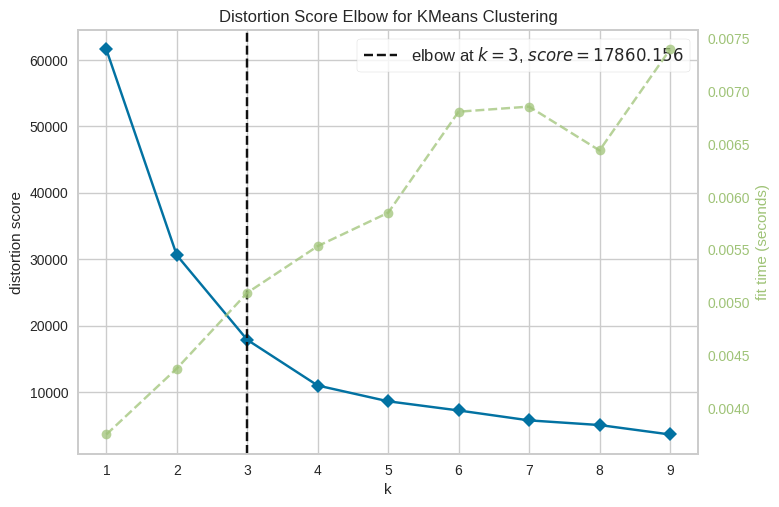

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [68]:
# import kelbow
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(df_umap_kmeans)
visualizer.show()

best k = 3

In [69]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_umap_kmeans)

df_umap_kmeans['Cluster'] = kmeans.labels_

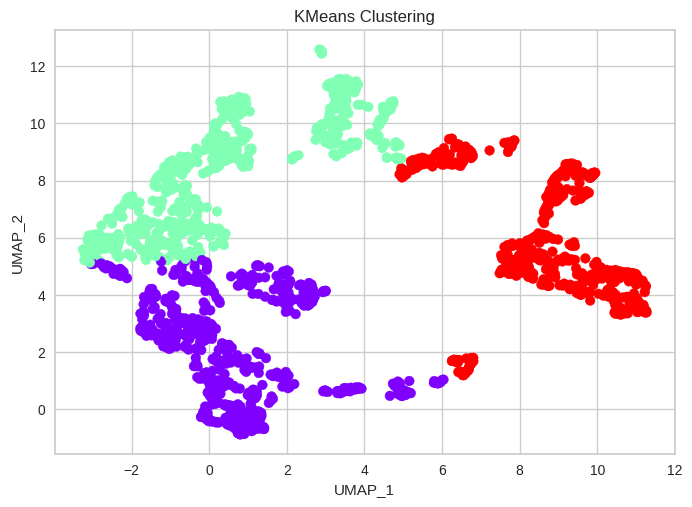

In [70]:
# visualize kmeans clustering
import matplotlib.pyplot as plt

plt.scatter(df_umap_kmeans['UMAP_1'], df_umap_kmeans['UMAP_2'], c=df_umap_kmeans['Cluster'], cmap='rainbow')
plt.xlabel('UMAP_1')
plt.ylabel('UMAP_2')
plt.title('KMeans Clustering')
plt.show()

## DBScan

In [71]:
# dbscan
from sklearn.cluster import DBSCAN

In [72]:
df_umap_dbscan = df_umap.copy()

for i in np.arange(0.1, 2, 0.1): # Iterate through a range of eps values
  dbscan = DBSCAN(eps=i, min_samples=5)
  dbscan.fit(df_umap_dbscan)
  labels = dbscan.labels_
  n_clusters = len(set(labels)) - (1 if -1 in labels else 0) # Count number of clusters ignoring noise

  if n_clusters >= 2: # Calculate silhouette score only if more than one cluster is found
    sil_score = silhouette_score(df_umap_dbscan, labels)
    print(f"Silhouette Score (eps = {i:.1f}): {sil_score:.2f} with {n_clusters} clusters")
  else:
    print(f"DBSCAN with eps = {i:.1f} resulted in {n_clusters} clusters. Silhouette score cannot be calculated.")

Silhouette Score (eps = 0.1): 0.09 with 132 clusters
Silhouette Score (eps = 0.2): 0.26 with 55 clusters
Silhouette Score (eps = 0.3): 0.10 with 23 clusters
Silhouette Score (eps = 0.4): 0.08 with 12 clusters
Silhouette Score (eps = 0.5): 0.12 with 9 clusters
Silhouette Score (eps = 0.6): 0.12 with 9 clusters
Silhouette Score (eps = 0.7): 0.25 with 6 clusters
Silhouette Score (eps = 0.8): 0.37 with 4 clusters
Silhouette Score (eps = 0.9): 0.37 with 4 clusters
Silhouette Score (eps = 1.0): 0.44 with 3 clusters
Silhouette Score (eps = 1.1): 0.43 with 2 clusters
Silhouette Score (eps = 1.2): 0.43 with 2 clusters
Silhouette Score (eps = 1.3): 0.43 with 2 clusters
Silhouette Score (eps = 1.4): 0.43 with 2 clusters
Silhouette Score (eps = 1.5): 0.43 with 2 clusters
DBSCAN with eps = 1.6 resulted in 1 clusters. Silhouette score cannot be calculated.
DBSCAN with eps = 1.7 resulted in 1 clusters. Silhouette score cannot be calculated.
DBSCAN with eps = 1.8 resulted in 1 clusters. Silhouette sco

In [73]:
eps = 1

In [74]:
dbscan = DBSCAN(eps=eps, min_samples=5)
dbscan.fit(df_umap_dbscan)

df_umap_dbscan['Cluster'] = dbscan.labels_

In [75]:
df_umap_dbscan['Cluster'].value_counts()

,count
Cluster,
0,1391
1,471
2,378


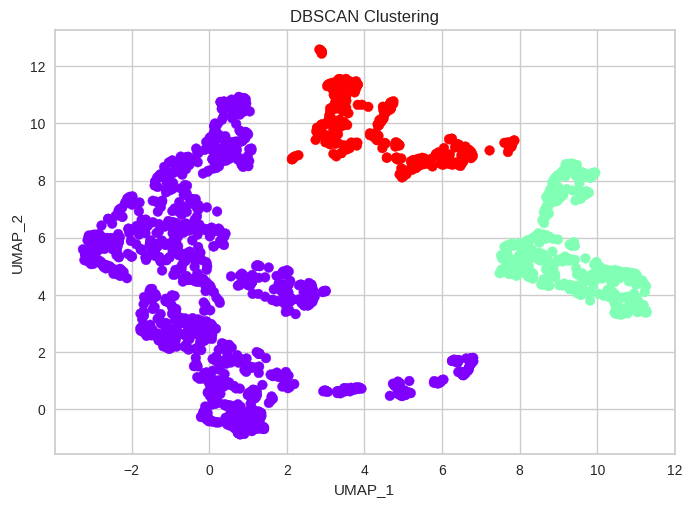

In [76]:
# visualize dbscan clustering
import matplotlib.pyplot as plt

plt.scatter(df_umap_dbscan['UMAP_1'], df_umap_dbscan['UMAP_2'], c=df_umap_dbscan['Cluster'], cmap='rainbow')
plt.xlabel('UMAP_1')
plt.ylabel('UMAP_2')
plt.title('DBSCAN Clustering')
plt.show()

## Agglomerative Clustering

In [77]:
from sklearn.cluster import AgglomerativeClustering

In [78]:
df_umap_agc = df_umap.copy()

for i in range(2, 11):
  agc = AgglomerativeClustering(n_clusters=i)
  agc.fit(df_umap_agc)
  sil_score = silhouette_score(df_umap_agc, agc.labels_)
  print(f"Silhouette Score (k = {i}): {sil_score:.2f}")

Silhouette Score (k = 2): 0.45
Silhouette Score (k = 3): 0.46
Silhouette Score (k = 4): 0.46
Silhouette Score (k = 5): 0.45
Silhouette Score (k = 6): 0.46
Silhouette Score (k = 7): 0.47
Silhouette Score (k = 8): 0.47
Silhouette Score (k = 9): 0.50
Silhouette Score (k = 10): 0.50


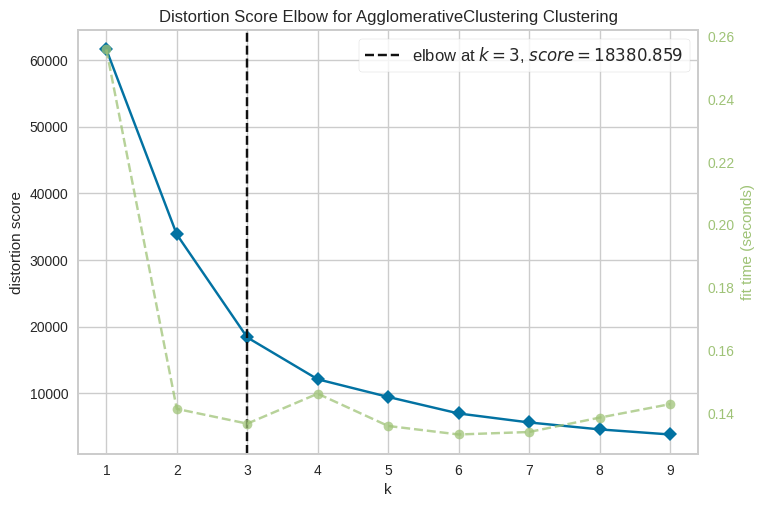

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [79]:
visualizer = KElbowVisualizer(agc, k=(1, 10))
visualizer.fit(df_umap_agc)
visualizer.show()

best k = 3

In [80]:
agc = AgglomerativeClustering(n_clusters=3)
agc.fit(df_umap_agc)

df_umap_agc['Cluster'] = agc.labels_
df_umap_agc['Cluster'].value_counts()

,count
Cluster,
0,896
2,736
1,608


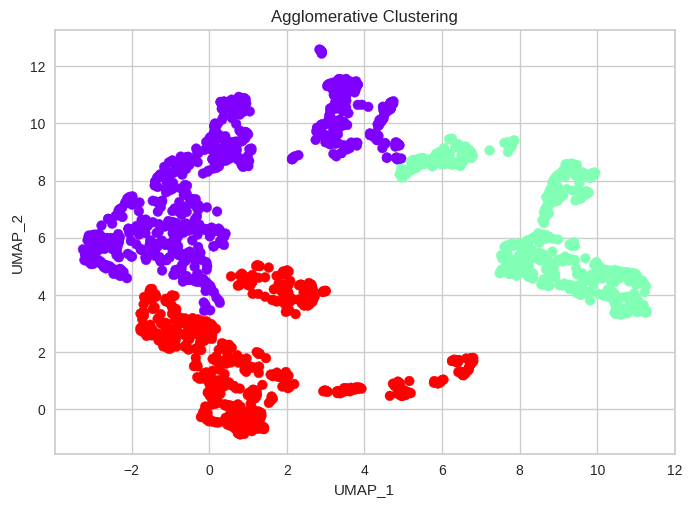

In [81]:
# visualize agc
import matplotlib.pyplot as plt

plt.scatter(df_umap_agc['UMAP_1'], df_umap_agc['UMAP_2'], c=df_umap_agc['Cluster'], cmap='rainbow')
plt.xlabel('UMAP_1')
plt.ylabel('UMAP_2')
plt.title('Agglomerative Clustering')
plt.show()

# Model Application

best model is KMeans with 3 clusters

In [82]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_umap_kmeans)

df_umap_kmeans['Cluster'] = kmeans.labels_

In [83]:
df_umap_kmeans['Cluster'].value_counts()

,count
Cluster,
1,806
0,779
2,655


In [84]:
x['Cluster'] = df_umap_kmeans['Cluster']

In [85]:
x.groupby('Cluster').describe()

Income                                                                 \
         count          mean           std        min         25%         50%   
Cluster                                                                         
0        774.0  4.552844e+07  2.022144e+07  1730000.0  28323000.0  44676500.0   
1        797.0  6.509574e+07  3.003323e+07  2447000.0  49681000.0  66973000.0   
2        645.0  4.443348e+07  1.594072e+07  5305000.0  33228000.0  43142000.0   

                                 Recency                                   \
                75%          max   count       mean        std  min   25%   
Cluster                                                                     
0        62816750.0   92556000.0   779.0  46.439024  28.974545  0.0  21.5   
1        79593000.0  666666000.0   806.0  50.827543  28.454716  0.0  25.0   
2        55801000.0   93404000.0   655.0  50.170992  29.379902  0.0  26.0   

                          NumWebVisitsMonth                                \
          50%   75%   max             count      mean       std  min  25%   
Cluster                                                                     
0        46.0  71.0  99.0             779.0  5.658537  2.302109  0.0  4.0   
1        53.5  74.0  99.0             806.0  4.308933  2.692542  0.0  2.0   
2        50.0  77.0  99.0             655.0  6.149618  1.687033  1.0  5.0   

                        Complain                                               \
         50%  75%   max    count      mean       std  min  25%  50%  75%  max   
Cluster                                                                         
0        6.0  7.0  20.0    779.0  0.011553  0.106932  0.0  0.0  0.0  0.0  1.0   
1        4.0  6.0  20.0    806.0  0.002481  0.049783  0.0  0.0  0.0  0.0  1.0   
2        6.0  7.0  13.0    655.0  0.015267  0.122707  0.0  0.0  0.0  0.0  1.0   

        Total_Purchases                                                     \
                  count       mean       std  min   25%   50%    75%   max   
Cluster                                                                      
0                 779.0  13.691913  7.610038  0.0   7.0  12.0  20.00  34.0   
1                 806.0  17.637717  7.078286  0.0  13.0  19.0  22.75  44.0   
2                 655.0  12.838168  7.482584  1.0   7.0  10.0  18.50  39.0   

        Web_Purchase_Rate                                               \
                    count      mean       std  min       25%       50%   
Cluster                                                                  
0                   779.0  0.877548  0.756629  0.0  0.285714  0.600000   
1                   806.0  1.650838  1.902657  0.0  0.500000  1.400000   
2                   655.0  0.641249  0.516034  0.0  0.250000  0.428571   

                           Age                                                \
              75%   max  count       mean        std   min   25%   50%   75%   
Cluster                                                                        
0        1.333333   4.0  779.0  43.792041  12.583107  18.0  35.0  43.0  54.0   
1        2.250000  27.0  806.0  46.697270  12.758927  19.0  38.0  45.0  57.0   
2        1.000000   2.5  655.0  45.012214   9.888979  24.0  38.0  43.0  53.0   

               People_at_Home                                               \
           max          count      mean       std  min  25%  50%  75%  max   
Cluster                                                                      
0        121.0          779.0  1.872914  0.383494  1.0  2.0  2.0  2.0  3.0   
1        115.0          806.0  2.043424  0.990313  1.0  1.0  2.0  3.0  5.0   
2         65.0          655.0  3.247328  0.465857  3.0  3.0  3.0  3.0  5.0   

        Spent_per_Income                                                    \
                   count      mean       std       min       25%       50%   
Cluster                                                                      
0         

In [86]:
num_cluster = []

for col in num_features_2:
  if col in x.columns:
    num_cluster.append(col)

cat_cluster = []

for col in cat_features_2:
  if col not in num_cluster:
    cat_cluster.append(col)

In [87]:
x.groupby('Cluster')[num_cluster].mean().transpose()

Cluster,0,1,2
Income,4.552844e+07,6.509574e+07,4.443348e+07
Recency,4.643902e+01,5.082754e+01,5.017099e+01
NumWebVisitsMonth,5.658537e+00,4.308933e+00,6.149618e+00
Total_Purchases,1.369191e+01,1.763772e+01,1.283817e+01
Web_Purchase_Rate,8.775475e-01,1.650838e+00,6.412491e-01
Age,4.379204e+01,4.669727e+01,4.501221e+01
People_at_Home,1.872914e+00,2.043424e+00,3.247328e+00
Spent_per_Income,8.532025e-03,1.444341e-02,5.967732e-03
Accepted_CMP,1.309371e-01,6.215881e-01,9.770992e-02
Conv_Rate,1.071069e-02,3.811326e-02,7.446302e-03


In [88]:
x.groupby('Cluster')[cat_cluster].value_counts()

Cluster  Education
0        S1           489
         S2           140
         D3            96
         SMA           54
1        S3           486
         S1           199
         S2            93
         D3            28
2        S1           439
         S2           137
         D3            79
Name: count, dtype: int64

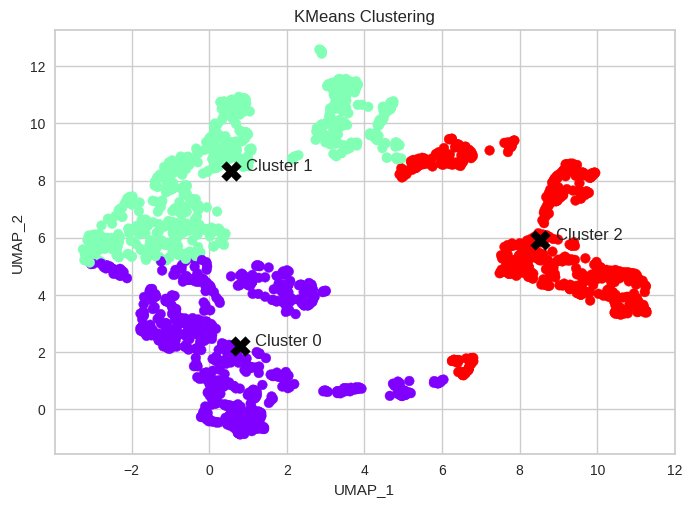

In [95]:
# visualize kmeans clustering
import matplotlib.pyplot as plt

plt.scatter(df_umap_kmeans['UMAP_1'], df_umap_kmeans['UMAP_2'], c=df_umap_kmeans['Cluster'], cmap='rainbow')
# show centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='black')
# annotate the centroids
for i, centroid in enumerate(kmeans.cluster_centers_):
  plt.annotate(f'Cluster {i}', (centroid[0] + 0.4, centroid[1]), fontsize=12)
plt.xlabel('UMAP_1')
plt.ylabel('UMAP_2')
plt.title('KMeans Clustering')
plt.show()

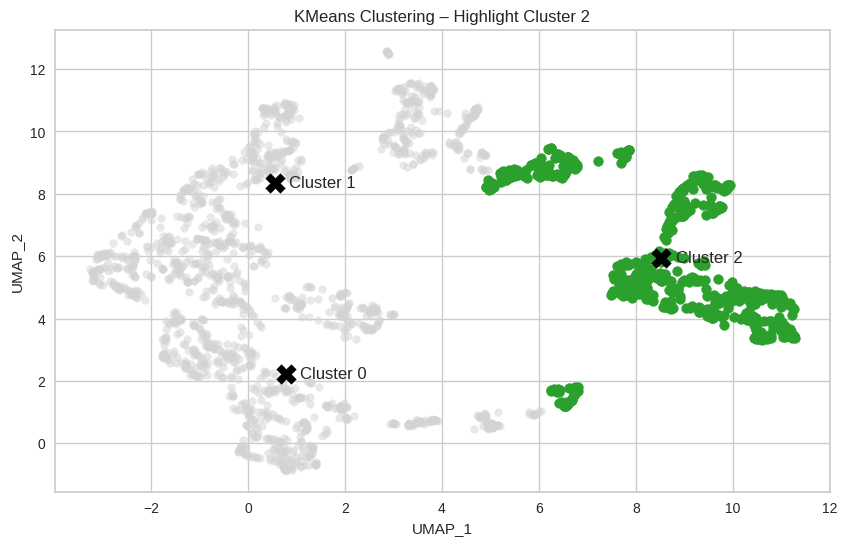

In [101]:
import matplotlib.pyplot as plt

highlight_cluster = 2 # Change this to highlight the cluster
colors = plt.cm.tab10(highlight_cluster)

plt.figure(figsize=(10, 6))

# Plot each cluster separately
for cluster_id in df_umap_kmeans['Cluster'].unique():
    cluster_data = df_umap_kmeans[df_umap_kmeans['Cluster'] == cluster_id]
    if cluster_id == highlight_cluster:
        plt.scatter(cluster_data['UMAP_1'], cluster_data['UMAP_2'],
                    label=f'Cluster {cluster_id}', c=[colors], s=50)
    else:
        plt.scatter(cluster_data['UMAP_1'], cluster_data['UMAP_2'],
                    color='lightgray', alpha=0.5, s=30)

# Plot all centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='X', s=200, c='black')

# Annotate centroids
for i, centroid in enumerate(kmeans.cluster_centers_):
    plt.annotate(f'Cluster {i}', (centroid[0] + 0.3, centroid[1]), fontsize=12, va='center')

plt.xlabel('UMAP_1')
plt.ylabel('UMAP_2')
plt.title(f'KMeans Clustering – Highlight Cluster {highlight_cluster}')
# plt.legend()
plt.show()


In [90]:
x

,Education,Income,Recency,NumWebVisitsMonth,Complain,Total_Purchases,Web_Purchase_Rate,Age,People_at_Home,Spent_per_Income,Accepted_CMP,Conv_Rate,Cluster
0,S1,58138000.0,58,7,0,25,1.142857,57,1,0.027813,0,0.000000,0
1,S1,46344000.0,38,5,0,6,0.200000,60,3,0.000583,0,0.000000,2
2,S1,71613000.0,26,4,0,21,2.000000,49,1,0.010836,0,0.000000,0
3,S1,26646000.0,26,6,0,8,0.333333,30,2,0.001989,0,0.000000,0
4,S3,58293000.0,94,5,0,19,1.000000,33,3,0.007239,0,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,S1,61223000.0,46,5,0,18,1.800000,47,3,0.021904,0,0.000000,2
2236,S3,64014000.0,56,7,0,22,1.142857,68,4,0.006936,1,0.071429,1
2237,S1,56981000.0,91,6,0,19,0.333333,33,1,0.021779,1,0.045455,1
2238,S2,69245000.0,8,3,0,23,2.000000,58,2,0.012174,0,0.000000,0
